### About Dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Problem Statement
Training a Machine Learning Model that correctly predicts whether a tumor is benign or malignant


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
raw_df = pd.read_csv('data.csv')
raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<Axes: >

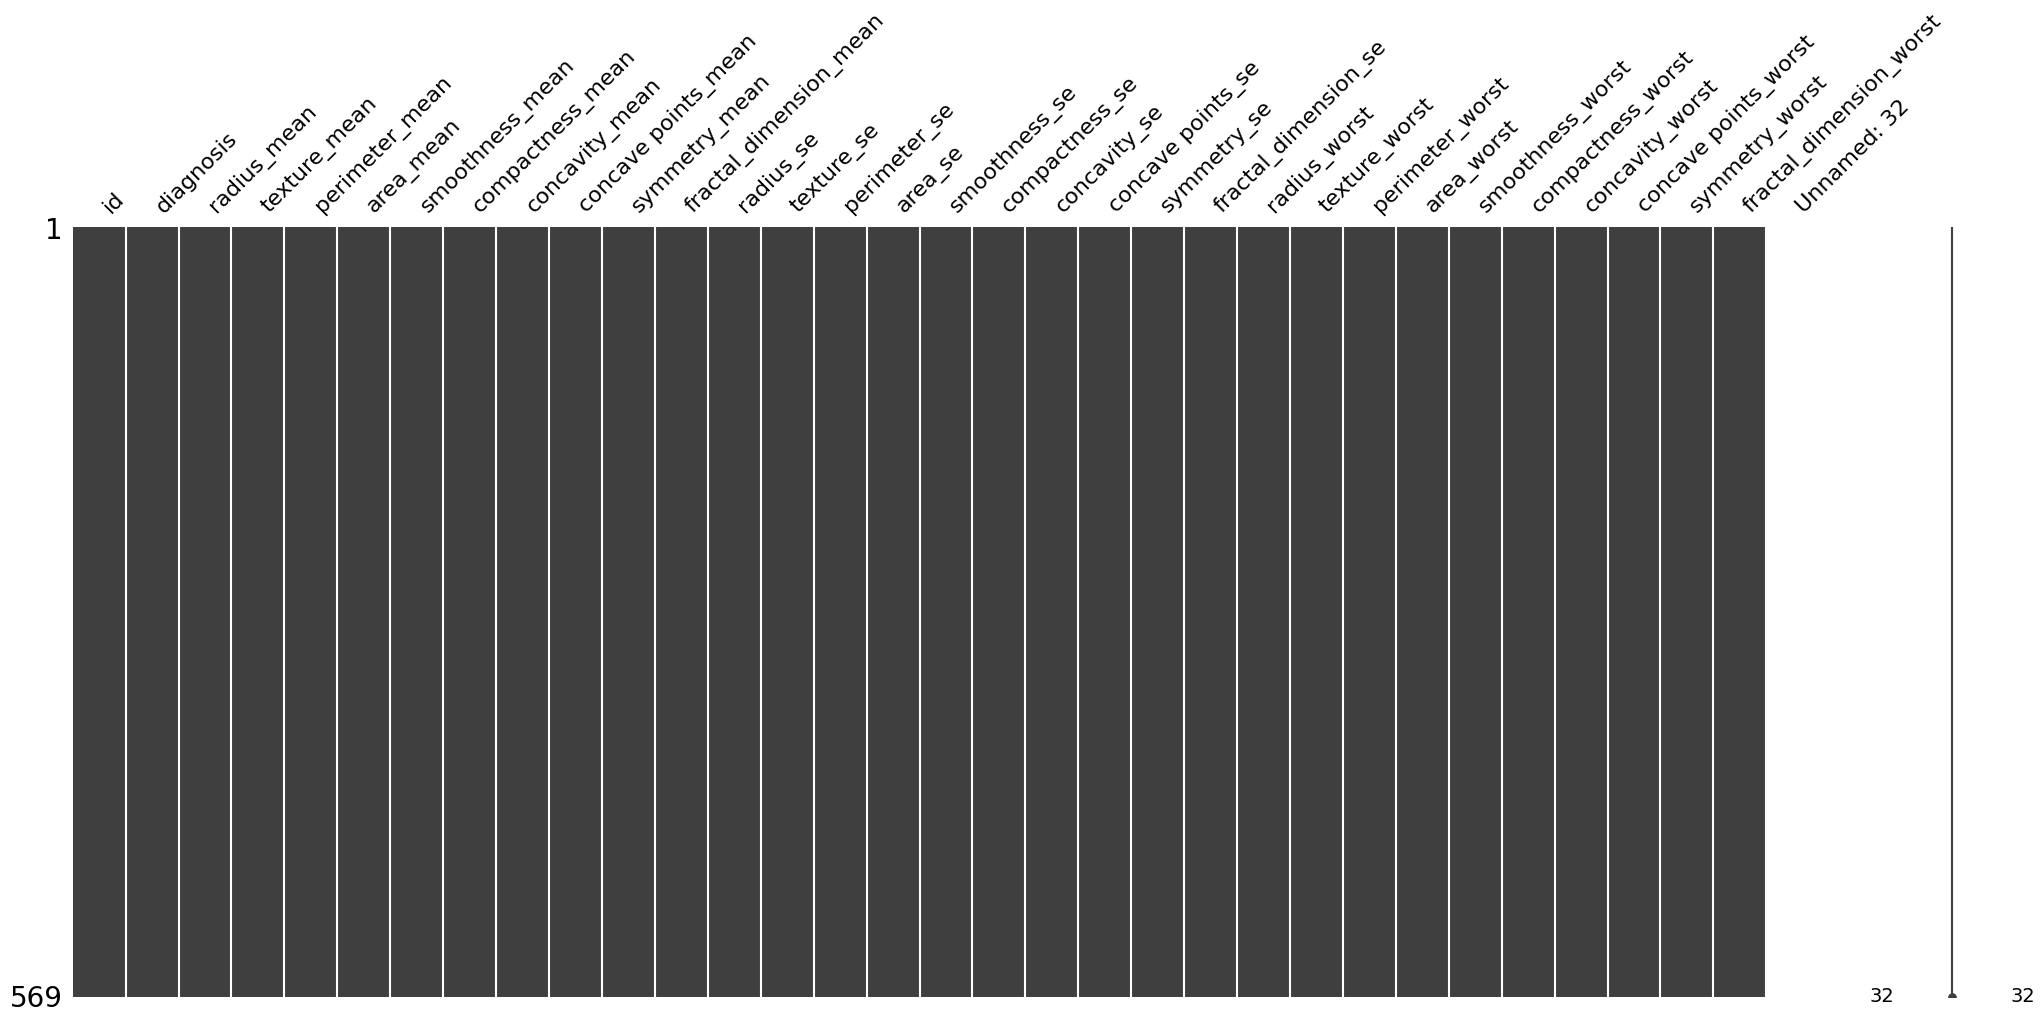

In [3]:
# Checking for null values
msno.matrix(raw_df)

The dataset contains no null values that need to be taken care of other than the last unnamed column

In [4]:
raw_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Dropping the last unnamed column
raw_df = raw_df.drop(columns='Unnamed: 32')
raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

on initial observation, we can see that some of the columns are already scaled

### Exploratory Data Analysis (Visualization)

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
px.histogram(raw_df, x='radius_mean', title='Radius Vs Diagnosis', color='diagnosis')

In [9]:
px.histogram(raw_df, x='smoothness_mean', color='diagnosis', title='Texture Vs Diagnosis')

In [10]:
px.histogram(raw_df, x='perimeter_mean', color='diagnosis', title='Perimeter Vs Diagnosis')

In [11]:
px.histogram(raw_df, x='area_mean', color='diagnosis', title='Area Vs Diagnosis')

In [12]:
px.scatter(raw_df, 
           title='radius vs texture', 
           x='radius_mean', 
           y='texture_mean', 
           color='diagnosis')

In [13]:
# Identifying the Numeric and Categorical columns for further analysis
numeric_cols = raw_df.select_dtypes(include=np.number).columns.to_list()
categorical_cols =  raw_df.select_dtypes('object').columns.to_list()

numeric_cols = numeric_cols[1:] # Removing id column from numeric columns
numeric_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [47]:
# Replacing the Values in the diagnosis column
# B (Benign) - 0
# M (Malignant) - 1
raw_df2 = raw_df.copy()
raw_df2['diagnosis'] = raw_df['diagnosis'].replace({'B' : 0, 'M' : 1})

# Verify the changes
print(raw_df2['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [15]:
numeric_df = raw_df2[numeric_cols]
correlation_matrix = numeric_df.corr()

# Calculate the correlation between each numeric feature and 'diagnosis'
correlation_with_diagnosis = numeric_df.corrwith(raw_df2['diagnosis'])

# Sort the correlations in descending order to identify the most influential features
sorted_correlations = correlation_with_diagnosis.abs().sort_values(ascending=False)

# Print or visualize the sorted correlations
print("Top 10 Correlations with diagnosis\n", sorted_correlations.head(10))


Top 10 Correlations with diagnosis
 concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
dtype: float64


Now that we have figured out the top 10 correlations, let's continue further with the data preprocessing tasks

In [16]:
# Creating the training, validation and test sets
from sklearn.model_selection import train_test_split

# train_df: 60% of the data for training your machine learning model.
# val_df: 20% of the data for validating and tuning your model during training.
# test_df: 20% of the data for evaluating the final performance of your trained model after training and validation.

train_val_df, test_df = train_test_split(raw_df2, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (341, 32)
val_df.shape : (114, 32)
test_df.shape : (114, 32)


### Identifying the Input and Target Columnns

In [17]:
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,8811779,0,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,8912280,1,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,915186,0,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,...,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,88518501,0,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,857793,1,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,...,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940
492,914062,1,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,...,21.53,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625
418,906024,0,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,...,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464
385,90291,1,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836


In [18]:
input_cols = list(train_df.columns)[2:] # Remove id and diagnosis
target_cols = 'diagnosis'

# Making copies before analyzing 

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

Next step is imputing the missing numeric data. Since, there are no missing values, we will go on to the next step.

### Scaling Numeric Features

In [19]:
# Instantiating the scaler
scaler = MinMaxScaler()

# Fit the scaler data
scaler.fit(raw_df[numeric_cols])
print('Minimum: ')
list(scaler.data_min_)

Minimum: 


[6.981,
 9.71,
 43.79,
 143.5,
 0.05263,
 0.01938,
 0.0,
 0.0,
 0.106,
 0.04996,
 0.1115,
 0.3602,
 0.757,
 6.802,
 0.001713,
 0.002252,
 0.0,
 0.0,
 0.007882,
 0.0008948,
 7.93,
 12.02,
 50.41,
 185.2,
 0.07117,
 0.02729,
 0.0,
 0.0,
 0.1565,
 0.05504]

In [20]:
print('Maximum: ')
list(scaler.data_max_)

Maximum: 


[28.11,
 39.28,
 188.5,
 2501.0,
 0.1634,
 0.3454,
 0.4268,
 0.2012,
 0.304,
 0.09744,
 2.873,
 4.885,
 21.98,
 542.2,
 0.03113,
 0.1354,
 0.396,
 0.05279,
 0.07895,
 0.02984,
 36.04,
 49.54,
 251.2,
 4254.0,
 0.2226,
 1.058,
 1.252,
 0.291,
 0.6638,
 0.2075]

In [21]:
# Scaling the training, validation and test sets
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [22]:
train_inputs[numeric_cols]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,0.152350,0.262766,0.146915,0.075376,0.251964,0.121741,0.135286,0.053231,0.456566,0.277801,...,0.126290,0.331823,0.124458,0.053701,0.159149,0.109061,0.153754,0.122715,0.256850,0.151187
283,0.438213,0.306392,0.449243,0.280636,0.487226,0.493283,0.456420,0.449901,0.412121,0.355518,...,0.377801,0.348348,0.380945,0.207875,0.431420,0.430102,0.401438,0.595189,0.237532,0.336219
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
504,0.108240,0.106865,0.122314,0.044624,1.000000,0.627323,0.227976,0.261034,0.665657,0.949031,...,0.083600,0.116205,0.092833,0.028264,0.786040,0.307371,0.167652,0.352234,0.290361,0.460186
251,0.213877,0.295570,0.203787,0.111941,0.368511,0.124318,0.061809,0.102833,0.390909,0.197557,...,0.179296,0.278252,0.162907,0.079557,0.311233,0.075298,0.064736,0.224880,0.231618,0.064476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.365801,0.401759,0.357681,0.217773,0.551323,0.359242,0.302952,0.403728,0.488384,0.371104,...,0.353611,0.497868,0.325166,0.196692,0.433402,0.389741,0.286502,0.630241,0.420461,0.356553
492,0.521984,0.366926,0.515583,0.366278,0.428546,0.335930,0.274133,0.385785,0.533333,0.227675,...,0.483814,0.374200,0.463121,0.304955,0.394440,0.199290,0.203195,0.511684,0.332348,0.139118
418,0.270671,0.083192,0.256306,0.149099,0.317956,0.118275,0.055295,0.119384,0.264141,0.269377,...,0.203486,0.130597,0.187808,0.093811,0.397742,0.129435,0.074960,0.282612,0.238518,0.259740
385,0.360594,0.459249,0.346762,0.221082,0.308658,0.144102,0.196579,0.261978,0.286364,0.088458,...,0.279616,0.524787,0.257931,0.140828,0.396421,0.126913,0.213658,0.467010,0.179775,0.087367


### Encoding Categorical Data
We had only a single categorical field, diagnosis, that we have already converted to numeric data

## Training the Logistic Regression Model
Try changing the solver to optimize the model

In [37]:
from sklearn.linear_model import LogisticRegression

# Instantiating the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Fit the inputs and targets
model.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

In [38]:
weight_df = pd.DataFrame({
    'feature' : (numeric_cols),
    'weight' : model.coef_.tolist()[0]
})

weight_df

,feature,weight
0,radius_mean,0.731442
1,texture_mean,0.889777
2,perimeter_mean,0.800486
3,area_mean,0.981430
4,smoothness_mean,-0.370886
5,compactness_mean,0.582761
6,concavity_mean,1.754964
7,concave points_mean,2.148799
8,symmetry_mean,-0.377425
9,fractal_dimension_mean,-1.318865


<Axes: xlabel='weight', ylabel='feature'>

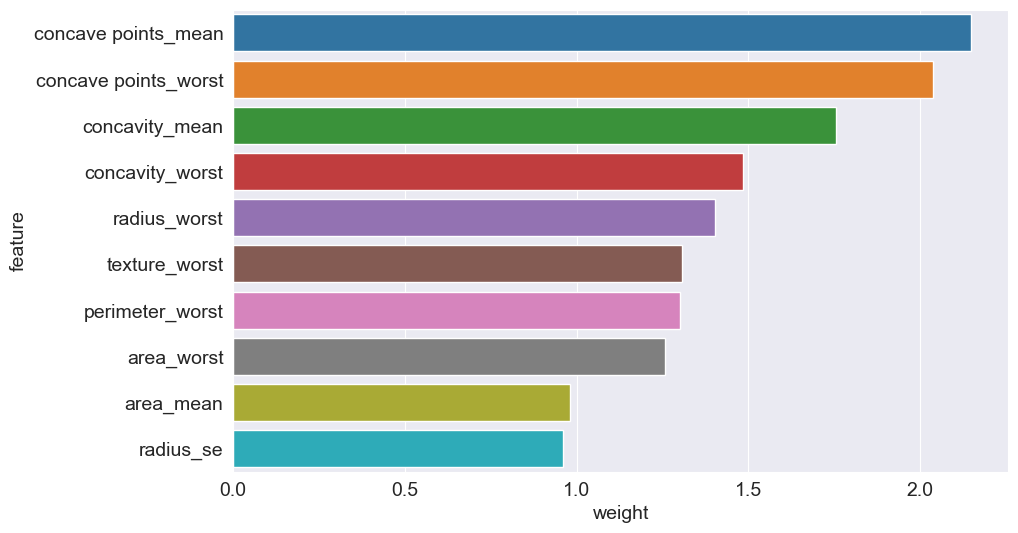

In [39]:
# Visualizing the important weights
sns.barplot(data=weight_df.sort_values(by='weight', ascending=False).head(10), x='weight', y='feature')

### Making Predictions and Evaluating the Model

In [40]:
train_preds = model.predict(train_inputs)

from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

0.9736070381231672

The model achieves an accuracy of 97.4% on the Training set.

In [41]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.99537037, 0.00462963],
       [0.064     , 0.936     ]])

In this model, the false negative value (FN) i.e., predicting that the cancerous(malignant) tumor as benign(non cancerous) is approximately 6.4%.

Accuracy: 97.36%


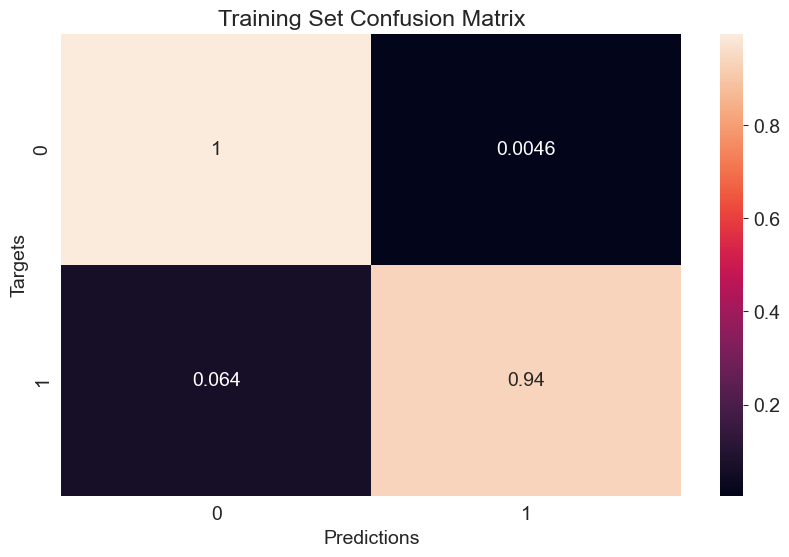

In [43]:
# Let's define a helper function that will generate predictions, compute accuracy score and plot the confusion matrix

def predict_and_plot(inputs, targets, name=''):

    # predict and calculate accuracy score
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%". format(accuracy*100))

    # plotting confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Predictions')
    plt.ylabel('Targets')
    plt.title("{} Confusion Matrix". format(name))
    
    return preds

train_preds = predict_and_plot(train_inputs, train_targets, "Training Set")

Accuracy: 95.61%


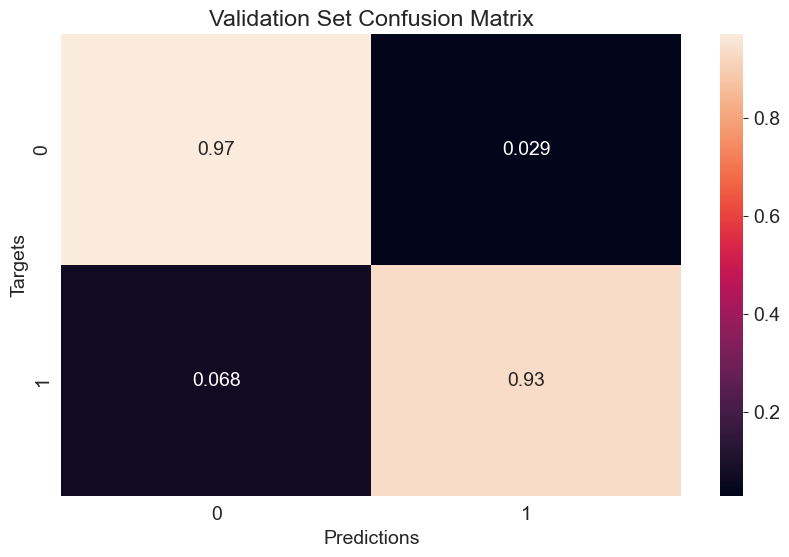

In [45]:
val_preds = predict_and_plot(val_inputs, val_targets, "Validation Set")

Accuracy: 96.49%


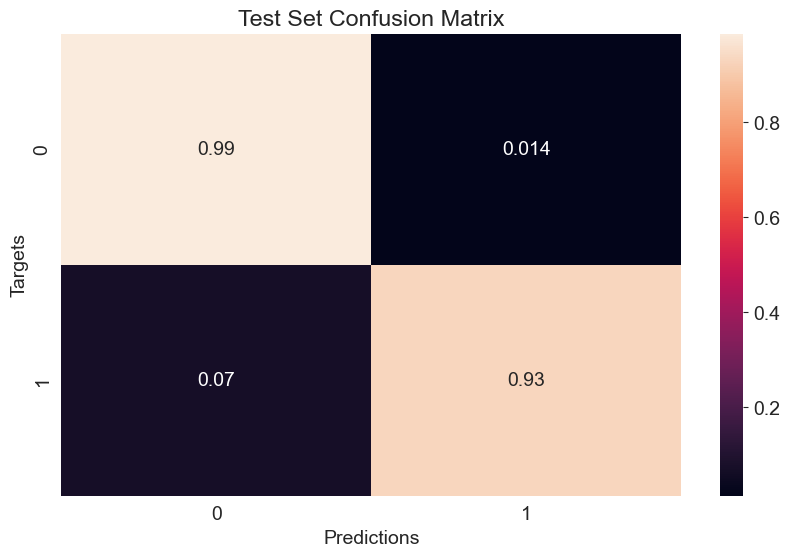

In [46]:
test_preds = predict_and_plot(test_inputs, test_targets, "Test Set")

## Comparing the model with some dumb models

#### Let's compare our model against three dumb models:

##### 1- Always predicts 0 i.e., the tumor is benign

In [49]:
def all_B(inputs):
    return np.full(len(inputs), 0)

accuracy_score(test_targets, all_B(test_inputs))

0.6228070175438597

##### 2- Always predicts 1 i.e., the tumor is malignant

In [48]:
def all_M(inputs):
    return np.full(len(inputs), 1)

accuracy_score(test_targets, all_M(test_inputs))

0.37719298245614036

##### 3- Random guesses

In [50]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))

accuracy_score(test_targets, random_guess(test_inputs))

0.5175438596491229

Our all benign model achieved an accuracy of 62% ,the all malignant model achieved an accuracy of 38% and the random model achieved 52% accuracy.
All three of the dumb models performed significantly more poorly than our model.

### Single Input Prediction
We can add a helper function to the model that will help with making single input predictions i.e., when supplied with the inputs the model will predict whether the tumor is cancerous or not for that individual input.

To do this, the single input will have to be subjected to all the data prepocessing that we did with our original dataset.

For scaling, we are not specifying the numeric_cols because the only categorical column in our dataset is the target itself which naturally would not be part of the input since the model is going to predict that.

In [52]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df = scaler.transform(input_df)
    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][list(model.classes_).index(pred)]
    return pred, prob

input_1 = {
        "radius_mean": 17.99,
        "texture_mean": 10.38,
        "perimeter_mean": 122.8,
        "area_mean": 1001,
        "smoothness_mean": 0.1184,
        "compactness_mean": 0.2776,
        "concavity_mean": 0.3001,
        "concave points_mean": 0.1471,
        "symmetry_mean": 0.2419,
        "fractal_dimension_mean": 0.07871,
        "radius_se": 1.095,
        "texture_se": 0.9053,
        "perimeter_se": 8.589,
        "area_se": 153.4,
        "smoothness_se": 0.006399,
        "compactness_se": 0.04904,
        "concavity_se": 0.05373,
        "concave points_se": 0.01587,
        "symmetry_se": 0.03003,
        "fractal_dimension_se": 0.006193,
        "radius_worst": 25.38,
        "texture_worst": 17.33,
        "perimeter_worst": 184.6,
        "area_worst": 2019,
        "smoothness_worst": 0.1622,
        "compactness_worst": 0.6656,
        "concavity_worst": 0.7119,
        "concave points_worst": 0.2654,
        "symmetry_worst": 0.4601,
        "fractal_dimension_worst": 0.1189
    }

predict_input(input_1)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



(1, 0.9940432276997215)

The model predicted that for the first set of input, the tumor is Malignant and the model is 99% sure about the prediction. A probability of 0.99 for the malignant class suggests that the model is very confident that the given input corresponds to a malignant tumor.

Let's try out with one more input.

In [53]:
input_2 = input_2 = {
    "radius_mean": 14.2,
    "texture_mean": 12.4,
    "perimeter_mean": 92.0,
    "area_mean": 600.4,
    "smoothness_mean": 0.102,
    "compactness_mean": 0.123,
    "concavity_mean": 0.089,
    "concave points_mean": 0.037,
    "symmetry_mean": 0.198,
    "fractal_dimension_mean": 0.065,
    "radius_se": 0.86,
    "texture_se": 1.34,
    "perimeter_se": 5.42,
    "area_se": 76.8,
    "smoothness_se": 0.006,
    "compactness_se": 0.019,
    "concavity_se": 0.032,
    "concave points_se": 0.010,
    "symmetry_se": 0.021,
    "fractal_dimension_se": 0.003,
    "radius_worst": 16.8,
    "texture_worst": 15.7,
    "perimeter_worst": 112.0,
    "area_worst": 876.6,
    "smoothness_worst": 0.131,
    "compactness_worst": 0.167,
    "concavity_worst": 0.185,
    "concave points_worst": 0.101,
    "symmetry_worst": 0.247,
    "fractal_dimension_worst": 0.065
}

predict_input(input_2)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



(0, 0.7708184132722486)

For this set of inputs, the model predicted that the tumor is Benign but the model is slightly less confident about its prediction, standing at 77%.

## Saving the model

In [56]:
import joblib

# Creating a dictionary containing all the requires objects
breast_cancer = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_cols': target_cols,
    'numeric_cols': numeric_cols,
    }

# Save the model to a file using joblib.dump
joblib.dump(breast_cancer, 'breast_cancer.joblib')

['breast_cancer.joblib']

## Loadind the model

In [57]:
breast_cancer_2 = joblib.load('breast_cancer.joblib')

In [58]:
# Let's use the loaded model to make predictions on the original test set.

test_preds_2 = breast_cancer_2['model'].predict(test_inputs)
accuracy_score(test_targets, test_preds_2)

0.9649122807017544

And we are done training our first Logistic Regression model! It definitely has room for improvements and I'll be updating the model after going through some other models thoroughly.